In [787]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [789]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/2513826476.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Part 1 - Data Preparation and Preprocessing. (15 Marks)

## 1. Describe the dataset. (8 Marks)

### Load the dataset. Describe the dataset (e.g.: type of column, value range). (1 Mark)

In [790]:
df = pd.read_csv('data.csv')

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/1507164070.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [792]:
_ids = df['Id'].nunique()
_titles = df['Title'].nunique()
_companies = df['Company'].nunique()
_dates = df['Date'].nunique()
_locations = df['Location'].nunique()
_area = df['Area'].nunique()
_classes = df['Classification'].nunique()
_subclasses = df['SubClassification'].nunique()
_requirements = df['Requirement'].nunique()
_description = df['FullDescription'].nunique()
_lowest_salary = df['LowestSalary'].nunique()
_highest_salary = df['HighestSalary'].nunique()
_job_type = df['JobType'].nunique()

data=[
    ['Ids', _ids],
    ['Titles', _titles],
    ['Companies', _companies],
    ['Dates', _dates],
    ['Locations', _locations],
    ['Area', _area],
    ['Classification', _classes],
    ['SubClassification', _subclasses],
    ['Requirement', _requirements],
    ['FullDescription', _description],
    ['LowestSalary', _lowest_salary],
    ['HighestSalary', _highest_salary],
    ['JobType', _job_type]
]
col_headers = ['Attribute', 'No. of Variations']
print(tabulate(data, headers=col_headers, tablefmt='grid'))


+-------------------+---------------------+
| Attribute         |   No. of Variations |
+===================+=====================+
| Ids               |              318477 |
+-------------------+---------------------+
| Titles            |              168065 |
+-------------------+---------------------+
| Companies         |               40628 |
+-------------------+---------------------+
| Dates             |                 163 |
+-------------------+---------------------+
| Locations         |                  65 |
+-------------------+---------------------+
| Area              |                  19 |
+-------------------+---------------------+
| Classification    |                  30 |
+-------------------+---------------------+
| SubClassification |                 338 |
+-------------------+---------------------+
| Requirement       |              234287 |
+-------------------+---------------------+
| FullDescription   |              250901 |
+-------------------+-----------

### How many records are there in the dataset? (1 Mark)

In [793]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [794]:
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columns.")

The Dataset consists of:  318477  rows and  13  columns.


### Which period does it cover? How many different dates have job postings? (1 Mark)

In [795]:
dates = df.sort_values('Date')['Date'].dropna().unique()
start_date = pd.to_datetime(dates[0])
start_date = start_date.date()
end_date = pd.to_datetime(dates[len(dates)-1])
end_date = end_date.date()

print("The dataset spans from", start_date, "to", end_date)
print("The dataset has ", _dates, " unique dates.")

The dataset spans from 2018-10-01 to 2019-03-13
The dataset has  163  unique dates.


### How many locations does the dataset have? Which location has the most job postings? (1 Mark)

In [796]:
location_counts = df['Location'].value_counts()
df_locations = pd.DataFrame(location_counts)
most_common_location = location_counts.idxmax()
df_locations.reset_index(inplace=True)
print("The dataset has ", _locations, " unique locations.")
print("The location with the most job listings is:", most_common_location)

The dataset has  65  unique locations.
The location with the most job listings is: Sydney


In [797]:
#Get top 10 big cities
locationTop10Df = df_locations[:10].copy()
#others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'count' : [df_locations["count"][10:].sum()]
})
locationTop10Df = pd.concat([locationTop10Df, new_row],sort=False)
locationTop10Df.index = locationTop10Df['Location']

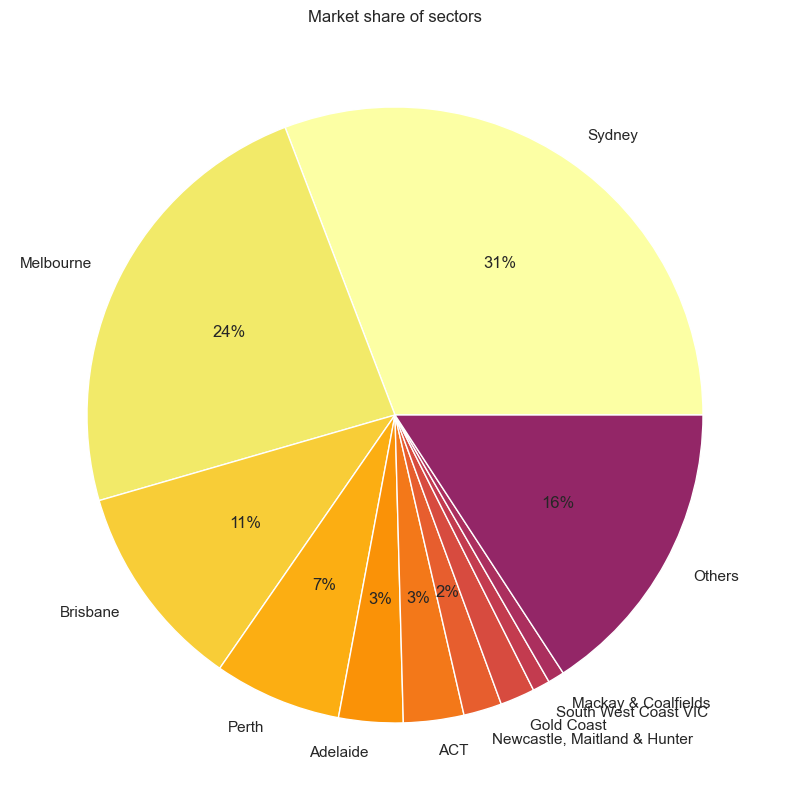

In [798]:

plt.figure(figsize=(10,10))
plt.title('Market share of sectors')
rgba = plt.cm.inferno_r(np.linspace(0, 0.6, len(locationTop10Df)))
plt.pie(
    locationTop10Df['count'],
     labels=locationTop10Df['Location'],     
     colors= rgba,
      autopct=lambda pct: f'{pct:.0f}%' if pct >= 2 else '',)
plt.show()

### How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings. (1 Mark)

In [799]:
classification_counts = df['Classification'].value_counts()
classification_counts

Classification
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property   

### Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number (1 Mark)

In [800]:
df_hcm = df[df['Classification'] == 'Healthcare & Medical']
total_sub = df_hcm['SubClassification'].nunique()
subclassification_counts = df_hcm['SubClassification'].value_counts()
print("There are", total_sub, "sub-sectors in the Healthcare & Medical sector.")
subclassification_counts

There are 33 sub-sectors in the Healthcare & Medical sector.


SubClassification
Nursing - Aged Care                                2130
Physiotherapy, OT & Rehabilitation                 1821
General Practitioners                              1263
Psychology, Counselling & Social Work              1123
Nursing - General Medical & Surgical               1066
Dental                                             1046
Other                                               829
Medical Administration                              812
Pharmacy                                            808
Medical Specialists                                 748
Pharmaceuticals & Medical Devices                   502
Management                                          496
Medical Imaging                                     487
Nursing - A&E, Critical Care & ICU                  446
Nursing - Psych, Forensic & Correctional Health     433
Nursing - Management                                374
Sales                                               347
Nursing - Community, Maternal 

### List the salary ranges and their total of job postings. (1 Mark)

In [801]:
low = df['LowestSalary'].dropna().unique()
high = df['HighestSalary'].dropna().unique()
assert(len(low)==len(high))

df_salary_ranges = pd.DataFrame({"Low": low, "High":high})
df_salary_ranges['Count'] = df_salary_ranges['Low'].apply(lambda x: len(df[df['LowestSalary']==x]))
print("Total number of job postings:",sum(df_salary_ranges['Count']))
df_salary_ranges

Total number of job postings: 318477


,Low,High,Count
0,0,30,62639
1,30,40,23476
2,40,50,34436
3,50,60,27027
4,60,70,28499
5,70,80,28712
6,80,100,24249
7,100,120,27673
8,120,150,24514
9,150,200,25841


### List the job types. In each job type, what are the lowest salary and highest salary? (1 Mark)

In [802]:
grouped = df.groupby('JobType').agg({'LowestSalary': 'min', 'HighestSalary': 'max'})
print(grouped)

                 LowestSalary  HighestSalary
JobType                                     
Casual/Vacation             0            999
Contract/Temp               0            999
Full Time                   0            999
Part Time                   0            999


### Observation:

1. Describe the dataset:

The Dataset consists of 318477  rows and  13  columns of job postings from seek.com from the 7st of October 2018 - 13th of March 2019. 

2. How many records are there in the dataset?
The dataset contains 318,477 records. Each record corresponds to a job posting from seek.com and is identified with unique ID in the dataset

3. Which period does it cover? How many different dates have job postings? 

The dataset covers the period from 2018-10-01 to 2019-03-13 as observed in the code above. The dataset contains 163 different dates where jobs were posting.

4. How many locations does the dataset have? Which location has the most job postings? 
The dataset contains 65 different locations around Australia and the location that has the most job postings is Sydney with the 31% of the job market distribution

5. How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings.

The dataset contains 30 job sectors.  In the following list have been shown the Job clasification with number of job postings

Classification
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                     3614
Design & Architecture                      1811
Insurance & Superannuation                 1474
Consulting & Strategy                      1206
Sport & Recreation                          984
Science & Technology                        905
Farming, Animals & Conservation             882
CEO & General Management                    844
Advertising, Arts & Media                   833
Self Employment                              93

6. Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number

The Job sector selected was "Health Care and Medical" and there are 33 subsectors in there. In the list we can find the job posting  number for each subsector:


SubClassification
Nursing - Aged Care                                2130
Physiotherapy, OT & Rehabilitation                 1821
General Practitioners                              1263
Psychology, Counselling & Social Work              1123
Nursing - General Medical & Surgical               1066
Dental                                             1046
Other                                               829
Medical Administration                              812
Pharmacy                                            808
Medical Specialists                                 748
Pharmaceuticals & Medical Devices                   502
Management                                          496
Medical Imaging                                     487
Nursing - A&E, Critical Care & ICU                  446
Nursing - Psych, Forensic & Correctional Health     433
Nursing - Management                                374
Sales                                               347
Nursing - Community, Maternal & Child Health        341
Nursing - Theatre & Recovery                        286
Residents & Registrars                              269
Nursing - Midwifery, Neo-Natal, SCN & NICU          251
Clinical/Medical Research                           231
Speech Therapy                                      173
Pathology                                           161
Nursing - Educators & Facilitators                  144
Optical                                             106
Natural Therapies & Alternative Medicine            101
Environmental Services                               79
Nursing - Paediatric & PICU                          57
Nursing - High Acuity                                57
Ambulance/Paramedics                                 49
Dieticians                                           38
Chiropractic & Osteopathic                           11


7. List the salary ranges and their total of job postings.

Low	High	total
0	0	30	62639
1	30	40	23476
2	40	50	34436
3	50	60	27027
4	60	70	28499
5	70	80	28712
6	80	100	24249
7	100	120	27673
8	120	150	24514
9	150	200	25841
10	200	999	11411

8. List the job types. In each job type, what are the lowest salary and highest salary?

                        LowestSalary  HighestSalary
JobType                                     
Casual/Vacation             0            999
Contract/Temp               0            999
Full Time                   0            999
Part Time                   0            999



## 2. Normalize and clean data. (7 Marks)

### The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job. (1 Mark)

In [803]:
df=df.assign(AverageSalary= lambda row:(row.LowestSalary + row.HighestSalary)/2)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [804]:
salaries = df[['LowestSalary', 'HighestSalary', 'AverageSalary']]
salaries.head(10)

,LowestSalary,HighestSalary,AverageSalary
0,0,30,15.0
1,0,30,15.0
2,0,30,15.0
3,0,30,15.0
4,0,30,15.0
5,0,30,15.0
6,0,30,15.0
7,0,30,15.0
8,0,30,15.0
9,0,30,15.0


### The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters. (1 Mark)

In [805]:
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)

### The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 Mark)

In [806]:
#Your code to clean date
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)

### Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 Mark)

In [807]:
# Set column "Id" to type int64
df["Id"] = df["Id"].astype(np.int64)

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])

# Data types after data cleaning and conversions
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

### Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it. ** (1.5 Marks)

In [808]:
# df.drop('Id', axis=1, inplace=True)
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)

Duplicates found:  108
Additional duplicates found without regard to timestamp:  43


### Check missing data and visualize them in a corresponding chart.** (1.5 Marks)

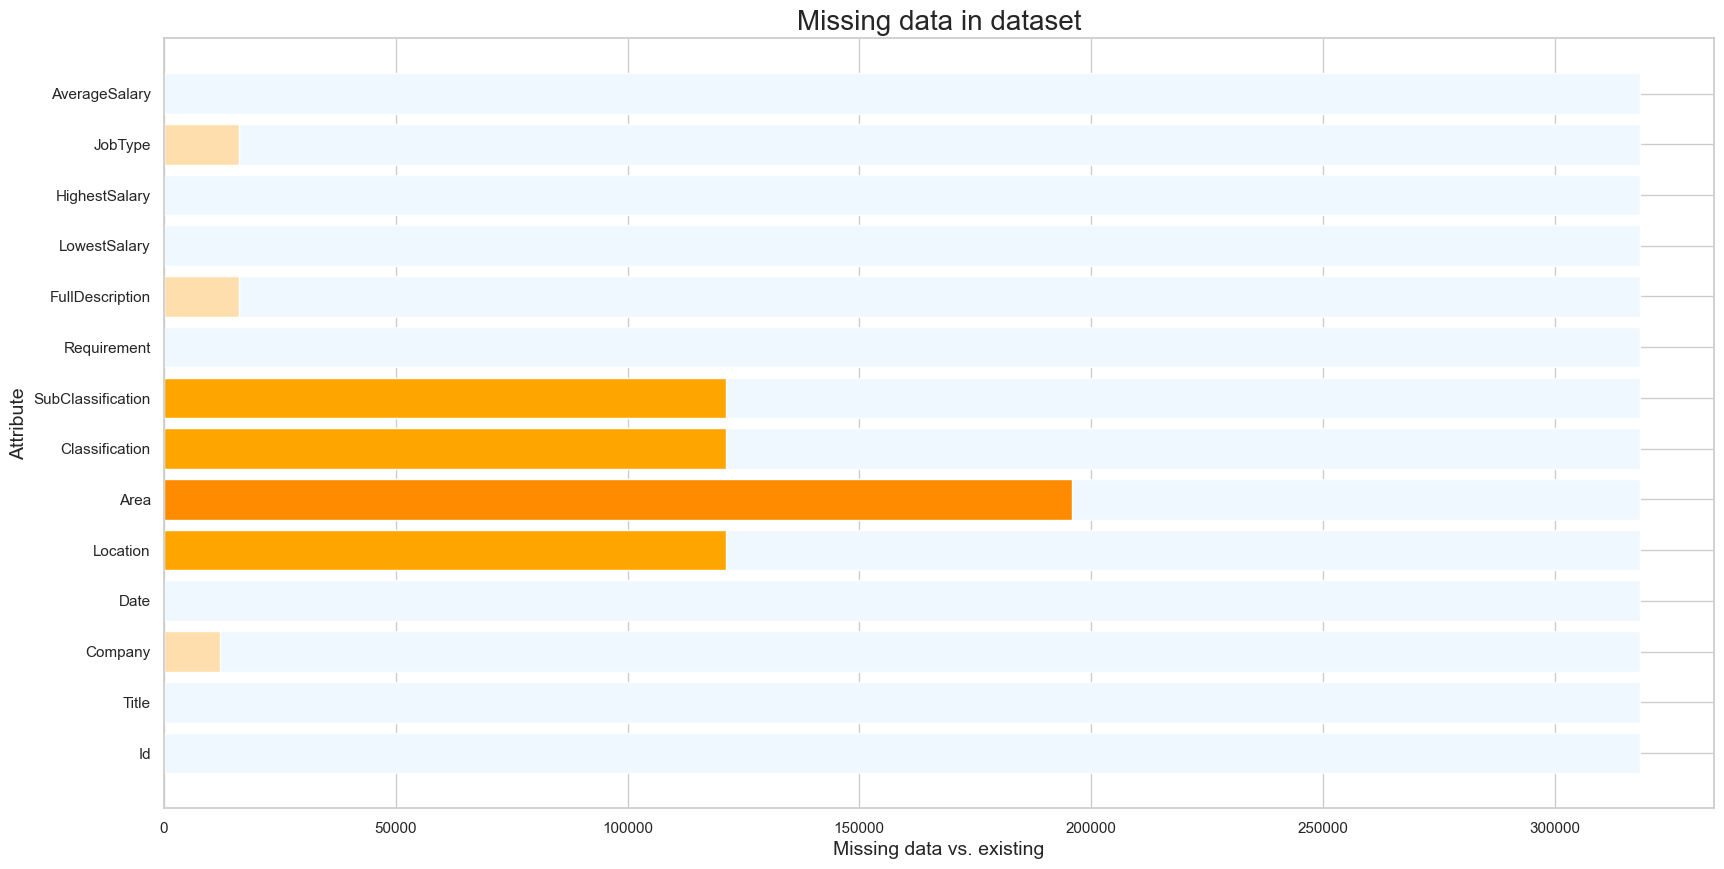

In [809]:

def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();

In [810]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# Part 2 - Data Understanding. (5 Marks)

### Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. (1 Mark)

In [811]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,"135,000",24514


#### Bar chart to display the correlations between “AverageSalary” and the total jobs of each range (2 marks)

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/1882112602.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=averageSalaryDf, x='AverageSalary', y='Count', palette=rgba, hue='AverageSalary', legend=False)


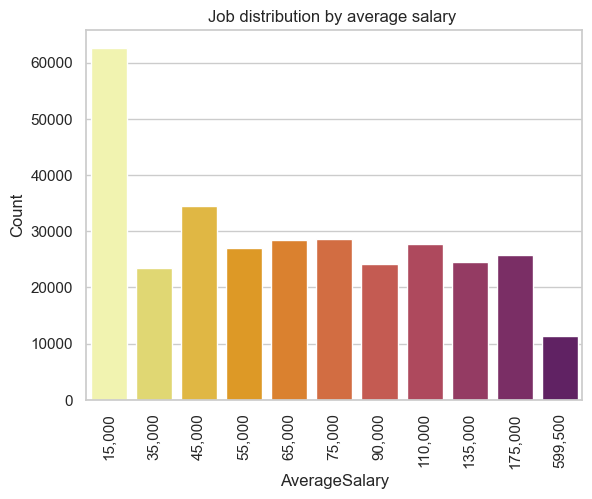

In [812]:
sns.set_style("whitegrid")

rgba = plt.cm.inferno_r(np.linspace(0, 0.7, len(averageSalaryDf)))
rank = averageSalaryDf['Count'].argsort().argsort() 
sns.barplot(data=averageSalaryDf, x='AverageSalary', y='Count', palette=rgba, hue='AverageSalary', legend=False)
plt.title('Job distribution by average salary ')
plt.xticks(rotation=90)
plt.show()

### Display the list of job types and the number of jobs of each type using pie chart. (1 Mark)

In [813]:
jobTypeDf = df.groupby('JobType').count()
jobTypeDf['Count'] = jobTypeDf["Id"]
jobTypeDf['JobType'] = jobTypeDf.index
jobTypeDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,AverageSalary,Count,JobType
JobType,,,,,,,,,,,,,,,
Casual/Vacation,25355,25355,23872,25355,16285,8751,16285,16285,25353,25342,25355,25355,25355,25355,Casual/Vacation
Contract/Temp,53906,53906,53085,53906,33962,20878,33962,33962,53906,53901,53906,53906,53906,53906,Contract/Temp
Full Time,201225,201225,192847,201225,122142,77946,122142,122142,201224,201169,201225,201225,201225,201225,Full Time
Part Time,21893,21893,20906,21893,13347,7862,13347,13347,21889,21890,21893,21893,21893,21893,Part Time


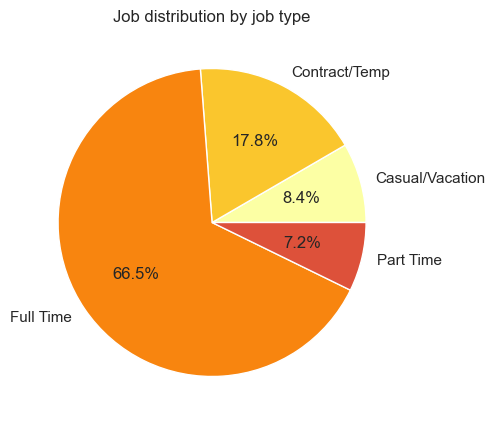

In [814]:
#Your code here
jobTypeDf = df.groupby('JobType').count()
jobTypeDf['Count'] = jobTypeDf["Id"]
jobTypeDf['JobType'] = jobTypeDf.index
rgba = plt.cm.inferno_r(np.linspace(0, 0.4, len(jobTypeDf)))
plt.figure(figsize=(5,5))
plt.title('Job distribution by job type')
plt.pie(
     jobTypeDf['Count'],
     labels=jobTypeDf['JobType'], 
     colors= rgba,
     autopct='%1.1f%%')

plt.show()


### Display the list of job sectors and the number of jobs of each type using horizontal bar chart. (1 Mark)

In [815]:
#Your code here

ClassificationDf = df[df['Classification'].isna()==False]
ClassificationDf = ClassificationDf.groupby('Classification').count()
ClassificationDf['Classification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]
ClassificationDf.sort_values(by='Count', ascending=False, inplace=True)

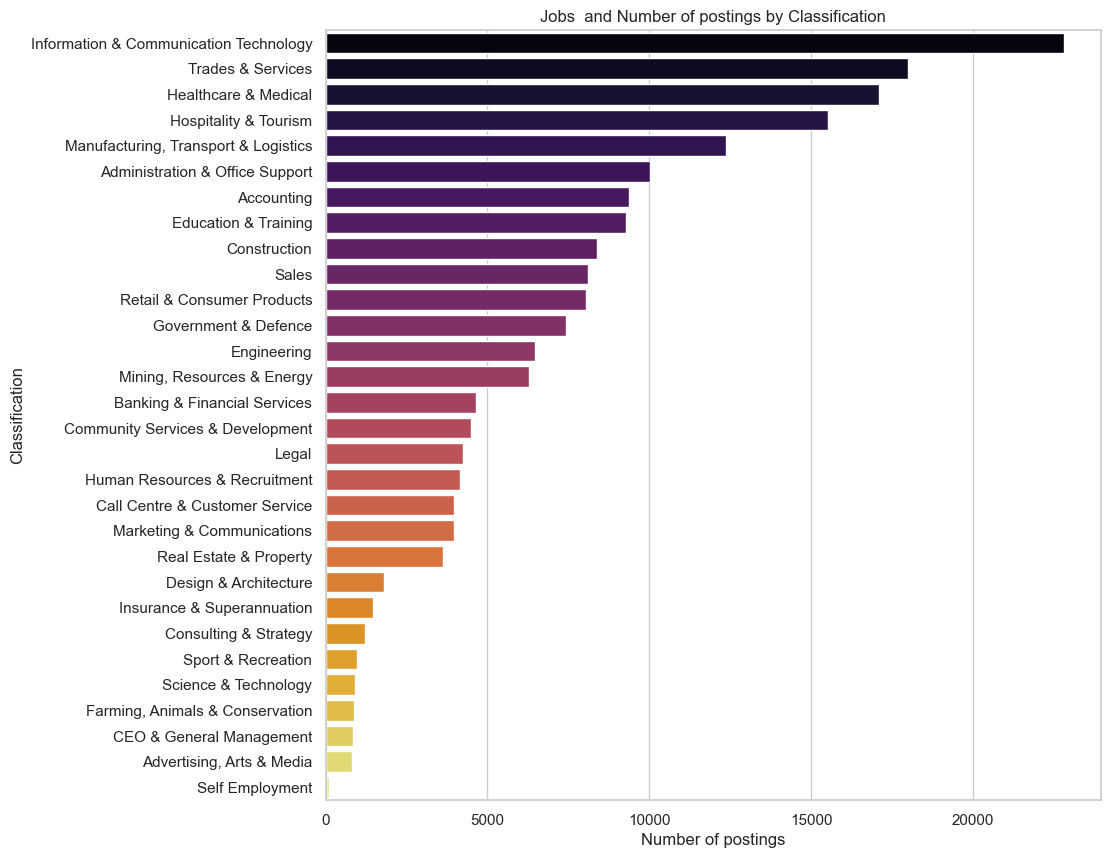

In [816]:
plt.figure(figsize=(10,10))
sns.barplot(
    data=ClassificationDf, 
    x='Count',
    y='Classification',
    color= '#377ead', 
    palette= 'inferno',
    hue='Classification',
    legend=False
    )

plt.title('Jobs  and Number of postings by Classification')
plt.xlabel('Number of postings')
plt.show()

### Choose your favorite location. Visualize the market share of that location in pie chart. (1 Mark)

Favourite location: Sydney.

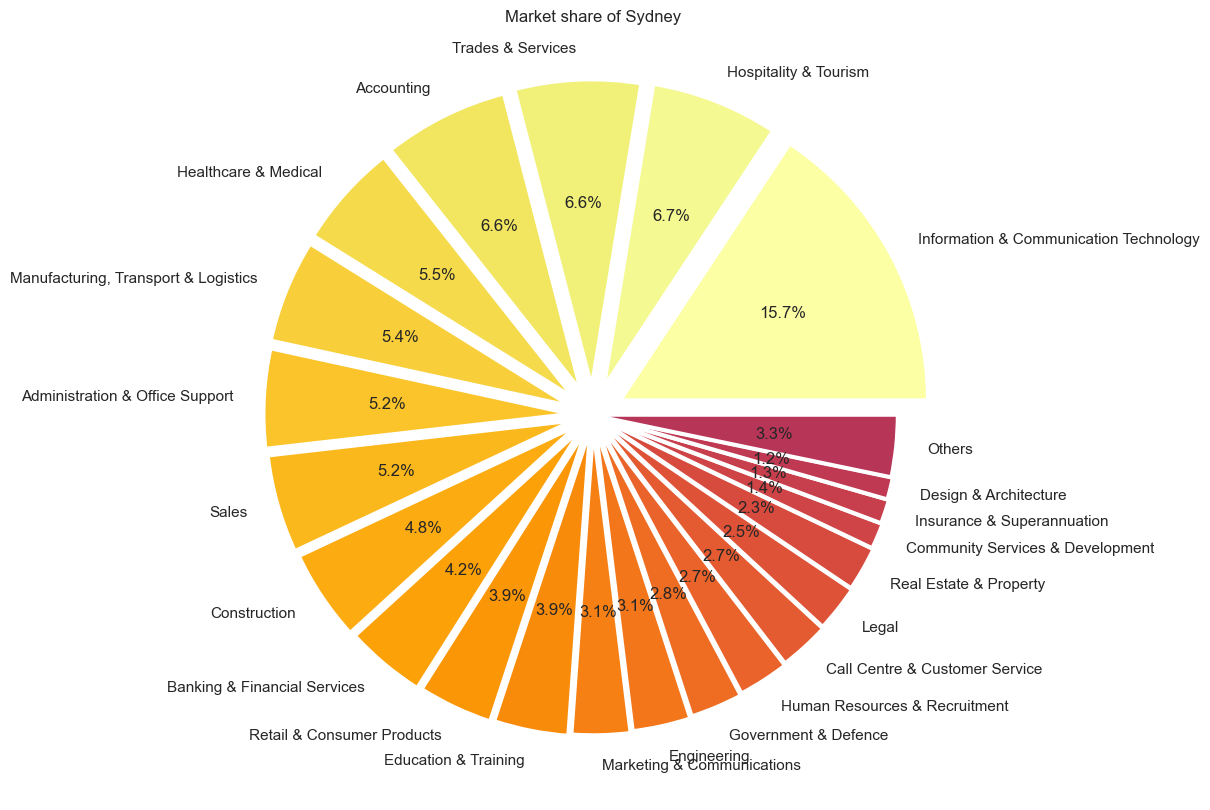

In [817]:
df_sydney = df[df['Location'] == 'Sydney']
df_sydney = df_sydney.groupby('Classification').count().sort_values(by='Id', ascending=False)
df_sydney['Value'] = df_sydney['Id']
df_sydney['Classification'] = df_sydney.index

df_pie=df_sydney[:22].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_sydney["Value"][22:].sum()]
})

rgba = plt.cm.inferno_r(np.linspace(0, 1, len(df_pie)*2))

df_pie = pd.concat([df_pie, new_row])
df_pie.index = df_pie['Classification']
explode = [0.1-x*0.005 for x in range(len(df_pie))]
plt.figure(figsize=(10,10))
plt.pie(df_pie['Value'], labels = df_pie['Classification'],explode=explode,colors=rgba, wedgeprops = {'linewidth': 3}, autopct='%1.1f%%')
plt.title('Market share of Sydney')
plt.show()


### Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart. (1 Mark)

In [818]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.sort_values(by='Count', ascending=False, inplace=True)

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/2952094028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


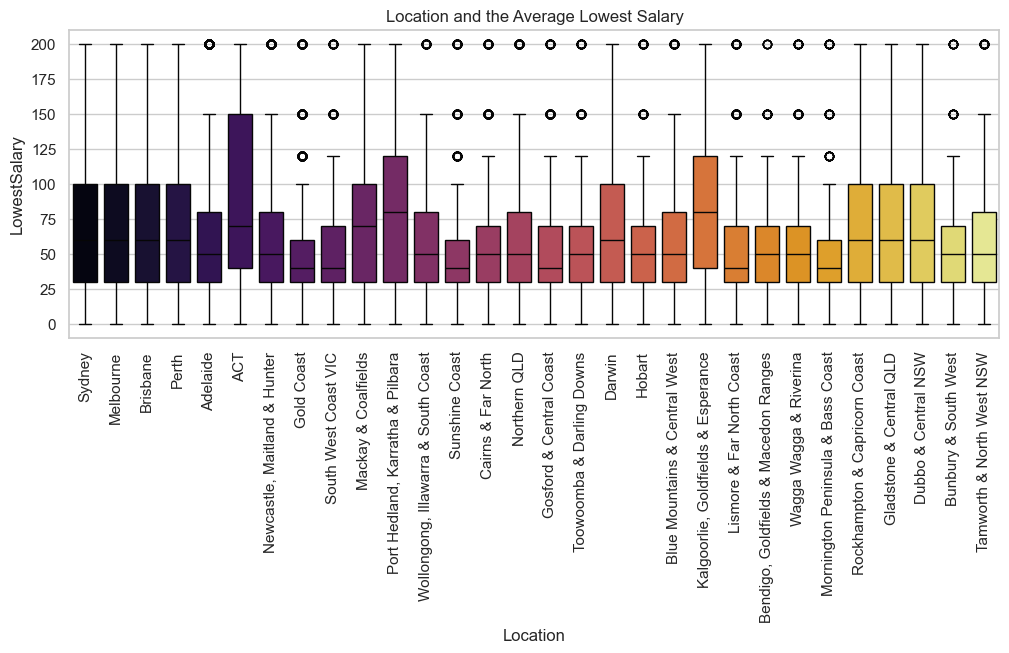

In [819]:
plt.figure(figsize=(12,4))
sns.boxplot(
    data= df,
    x='Location',
    y='LowestSalary',
    order= df.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist(),
    palette=sns.color_palette("inferno", n_colors=30),
)
plt.title('Location and the Average Lowest Salary')
plt.xticks(rotation=90)
plt.show()

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/1802310008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


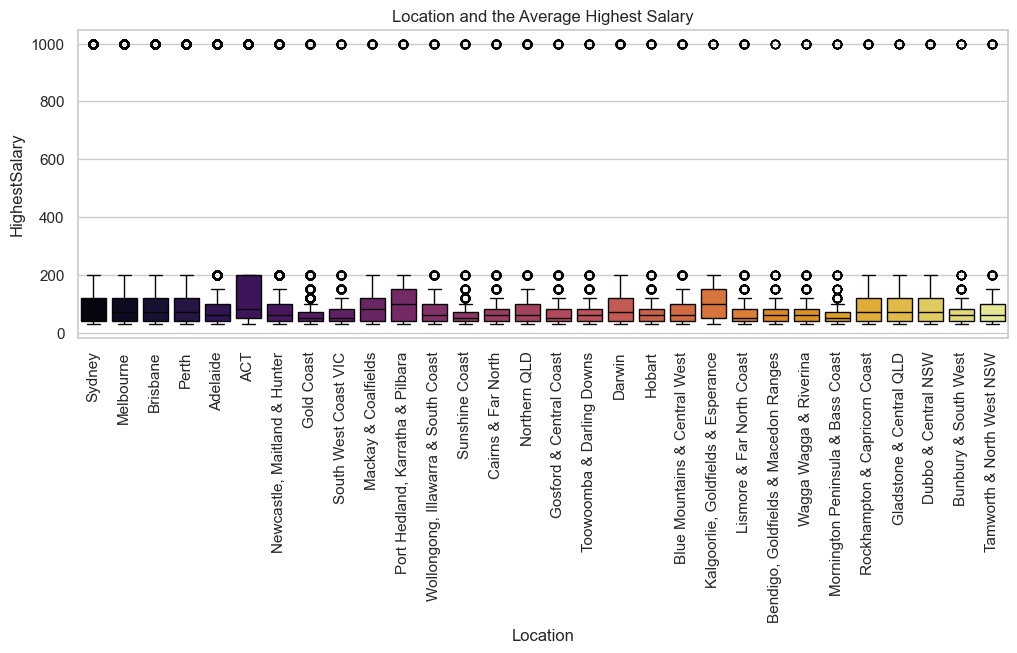

In [820]:
plt.figure(figsize=(12,4))
sns.boxplot(
    data= df,
    x='Location',
    y='HighestSalary',
    order= df.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist(),
    palette=sns.color_palette("inferno", n_colors=30)
)
plt.title('Location and the Average Highest Salary')
plt.xticks(rotation=90)
plt.show()

# Part 3 - Data Analysis and Visualisation (6 mark)

## 1. Analyse by comparison (2 mark)

### Choose your two favourite cities/locations

In [825]:
df_brisbane_sidney = df[(df['Location'] == 'Brisbane') | (df['Location'] == 'Sydney')]
df_brisbane = df[df['Location'] == 'Brisbane']
df_sydney = df[df['Location'] == 'Sydney']

### Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city?

<Figure size 640x480 with 0 Axes>

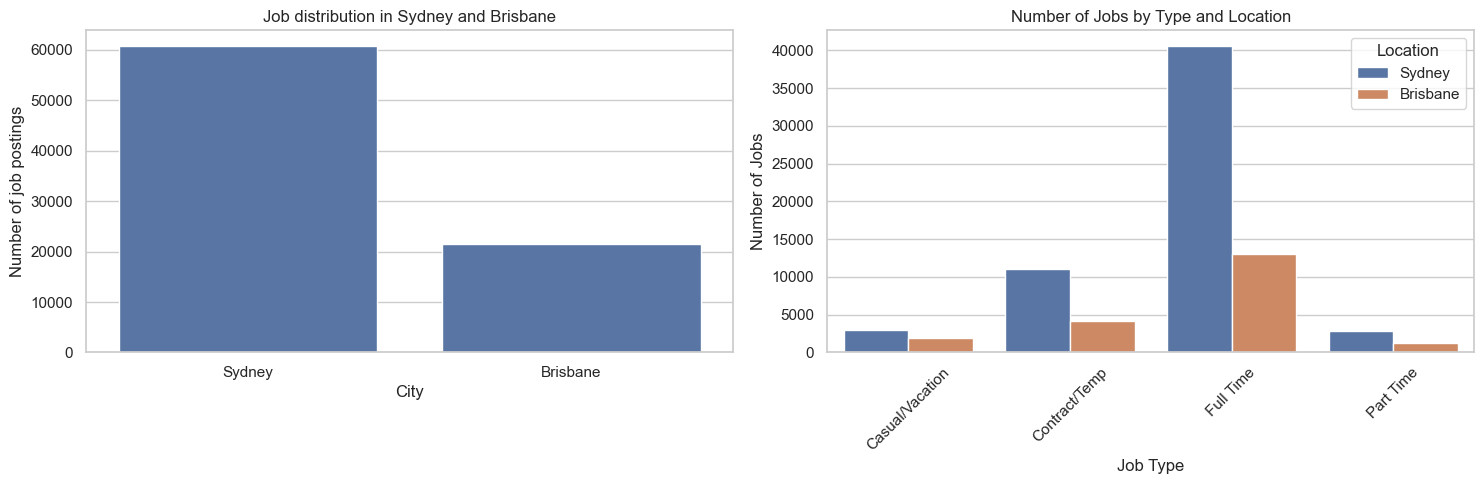

In [826]:
cities = ['Sydney', 'Brisbane']
map_df = pd.DataFrame({"Location":cities})
map_df['Count'] = map_df['Location'].apply(lambda x: df_brisbane_sidney[df_brisbane_sidney['Location'] == x].shape[0])
sydney_row, brisbane_row = map_df['Location'].apply(lambda x: df_brisbane_sidney[df_brisbane_sidney['Location'] == x].groupby('JobType').count())
sydney_row = sydney_row['Id']
brisbane_row = brisbane_row['Id']
combined_df = pd.concat([sydney_row, brisbane_row], axis=1)
combined_df.columns = ['Sydney', 'Brisbane']
combined_df.reset_index(inplace=True)

fig= plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data=map_df, x='Location', y='Count', ax=axes[0])
axes[0].set_title('Job distribution in Sydney and Brisbane')
axes[0].set_ylabel('Number of job postings')
axes[0].set_xlabel('City')

sns.barplot(data=pd.melt(combined_df, id_vars='JobType', var_name='Location', value_name='Count'), x='JobType', y='Count', hue='Location', ax=axes[1])

# Add title and labels
plt.title('Number of Jobs by Type and Location')
plt.xlabel('Job Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the legend
plt.legend(title='Location')

# Show the plot
plt.tight_layout()
plt.show()
# axes[2]= sns.barplot(data=sydney_row, x='JobType', y='Id')

### In each city, which are top 5 job sectors? How many jobs are there in each sector?

In [827]:
def extract_classification(df):
    classification_df = df.groupby('Classification').count().sort_values(by='Id', ascending=False)
    classification_df['Classification'] = classification_df.index     
    classification_df['Count'] = classification_df["Id"] 
    df2 = classification_df[:5].copy()
    new_row = pd.DataFrame(data = {
        'Classification' : ['Others'],
        'Count' : [classification_df["Count"][5:].sum()]
    })

    df2 = pd.concat([df2, new_row])
    df2.index = df2['Classification']
    return df2

brisbane_classification = extract_classification(df_brisbane)
sydney_classification = extract_classification(df_sydney)

print('Brisbane top 5 job sector and total of jobs for each job sector:\n',brisbane_classification['Count'],'\n')

print('Sydney top 5 job sector and total of jobs for each job sector:\n',sydney_classification['Count'])


Brisbane top 5 job sector and total of jobs for each job sector:
 Classification
Information & Communication Technology     2768
Trades & Services                          1993
Healthcare & Medical                       1824
Manufacturing, Transport & Logistics       1667
Hospitality & Tourism                      1335
Others                                    11879
Name: Count, dtype: int64 

Sydney top 5 job sector and total of jobs for each job sector:
 Classification
Information & Communication Technology     9548
Hospitality & Tourism                      4074
Trades & Services                          4026
Accounting                                 4010
Healthcare & Medical                       3339
Others                                    35768
Name: Count, dtype: int64


### Visualise the top 5 job sectors in pie chart for each city.

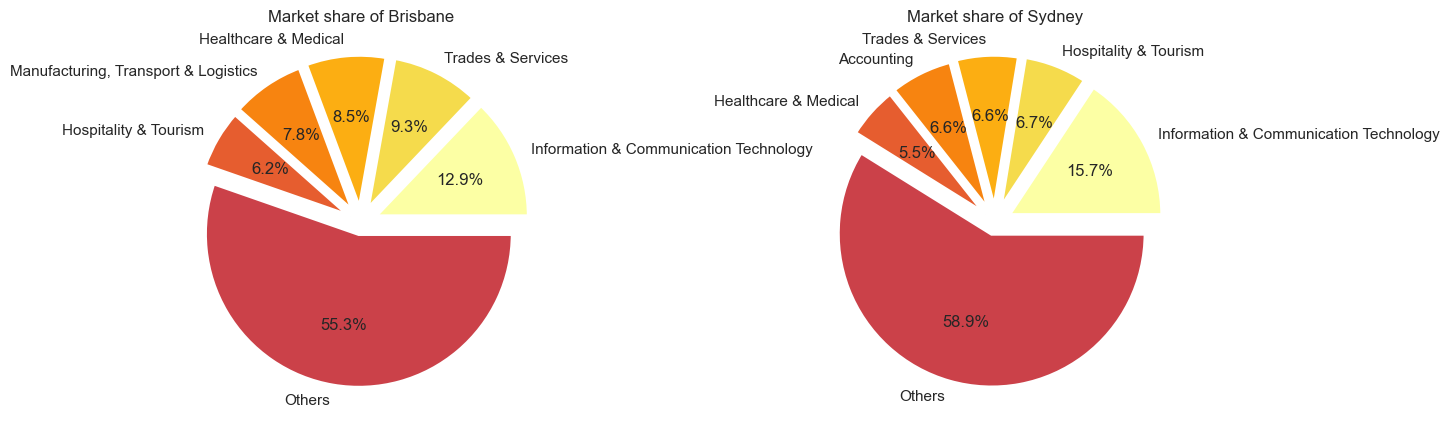

In [828]:
explode = [0.1-x*0.005 for x in range(len(brisbane_classification))]
rgba = plt.cm.inferno_r(np.linspace(0, 1, len(brisbane_classification)*2))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.pie(brisbane_classification['Count'], labels= brisbane_classification['Classification'],colors=rgba,explode=explode, wedgeprops = {'linewidth': 3}, autopct='%1.1f%%')
plt.title('Market share of Brisbane')
plt.subplot(122)
plt.pie(sydney_classification['Count'], labels= sydney_classification['Classification'],colors=rgba,explode=explode, wedgeprops = {'linewidth': 3}, autopct='%1.1f%%')
plt.title('Market share of Sydney')
plt.show()

### In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?

In [829]:
df_salary_ranges['Brisbane_Count'] = df_salary_ranges['Low'].apply(lambda x: len(df_brisbane[df_brisbane['LowestSalary']==x]))
df_salary_ranges['Sydney_Count'] = df_salary_ranges['Low'].apply(lambda x: len(df_sydney[df_sydney['LowestSalary']==x]))

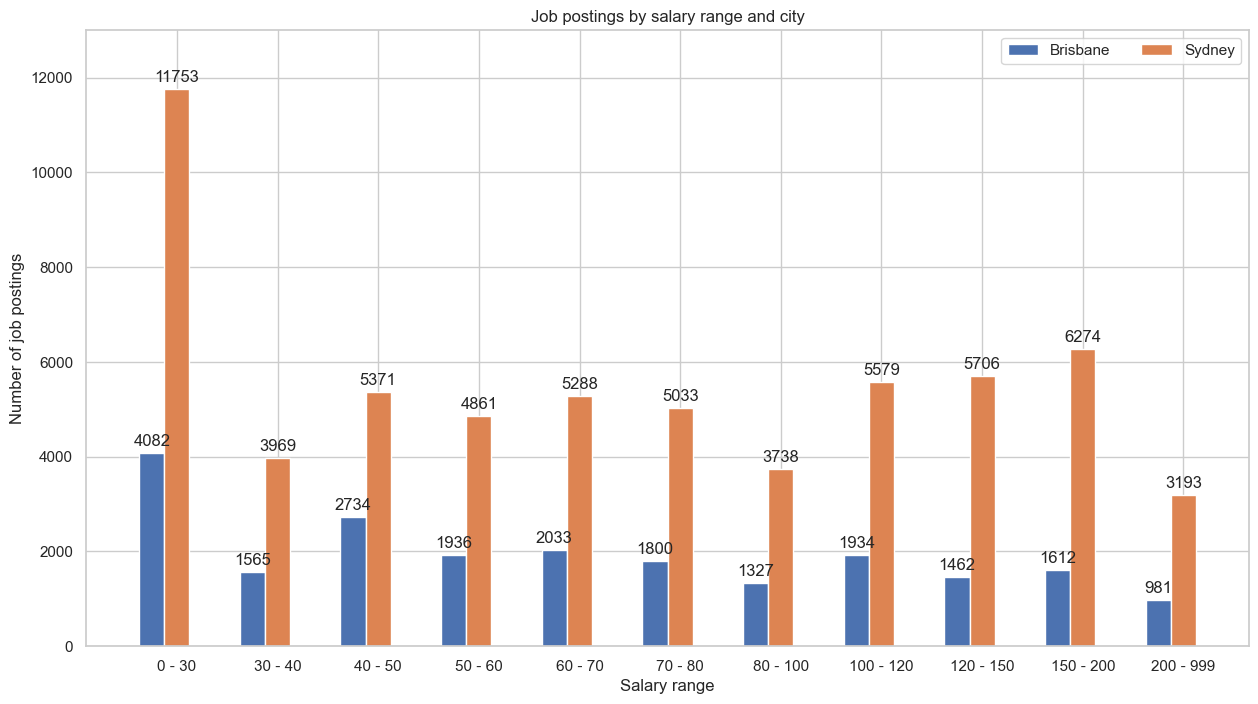

In [830]:
data_frame = pd.DataFrame(columns = [f'{x[1]["Low"]} - {x[1]["High"]}' for x in df_salary_ranges.iterrows()] )
data_frame.loc['Brisbane'] = df_salary_ranges['Brisbane_Count'].values
data_frame.loc['Sydney'] = df_salary_ranges['Sydney_Count'].values

data_frame = data_frame.transpose()

fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(data_frame))
bar_width = 0.25
multiplier = 0

for city in data_frame.columns:
    offset = bar_width * multiplier
    rects = ax.bar(x + offset, data_frame[city], bar_width, label=city)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Number of job postings')
ax.set_title('Job postings by salary range and city')
ax.set_xlabel('Salary range')
ax.set_xticks(x + bar_width, data_frame.index)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 13000)
plt.show()

### List top 5 companies in each city? Which sectors do they belong to?

In [831]:
def extract_top5(df):
    grouped_data = df.groupby('Company').count().sort_values(by='Id', ascending=False)
    top5 = grouped_data[:5].copy()
    top5.reset_index(inplace=True)
    top5['Sector'] = top5['Company'].apply(lambda x: df[df['Company'] == x]['Classification'].values[0])
    top5['Count'] = top5['Id']
    data = top5[['Company', 'Count', 'Sector']]
    return data

brisbane_top5 = extract_top5(df_brisbane)
sydney_top5 = extract_top5(df_sydney)
brisbane_top5


,Company,Count,Sector
0,Jora Local,314,Hospitality & Tourism
1,Hudson,267,Information & Communication Technology
2,u&u. Recruitment Partners,265,Accounting
3,The University of Queensland,248,Education & Training
4,Programmed Skilled Workforce,210,"Manufacturing, Transport & Logistics"


/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/987307390.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=brisbane_top5, x='Count', y='Company', palette=rgba, orient='y', hue='Company', legend=False)
/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/987307390.py:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=sydney_top5, x='Count', y='Company', palette=rgba, orient='y', hue='Company', legend=False)


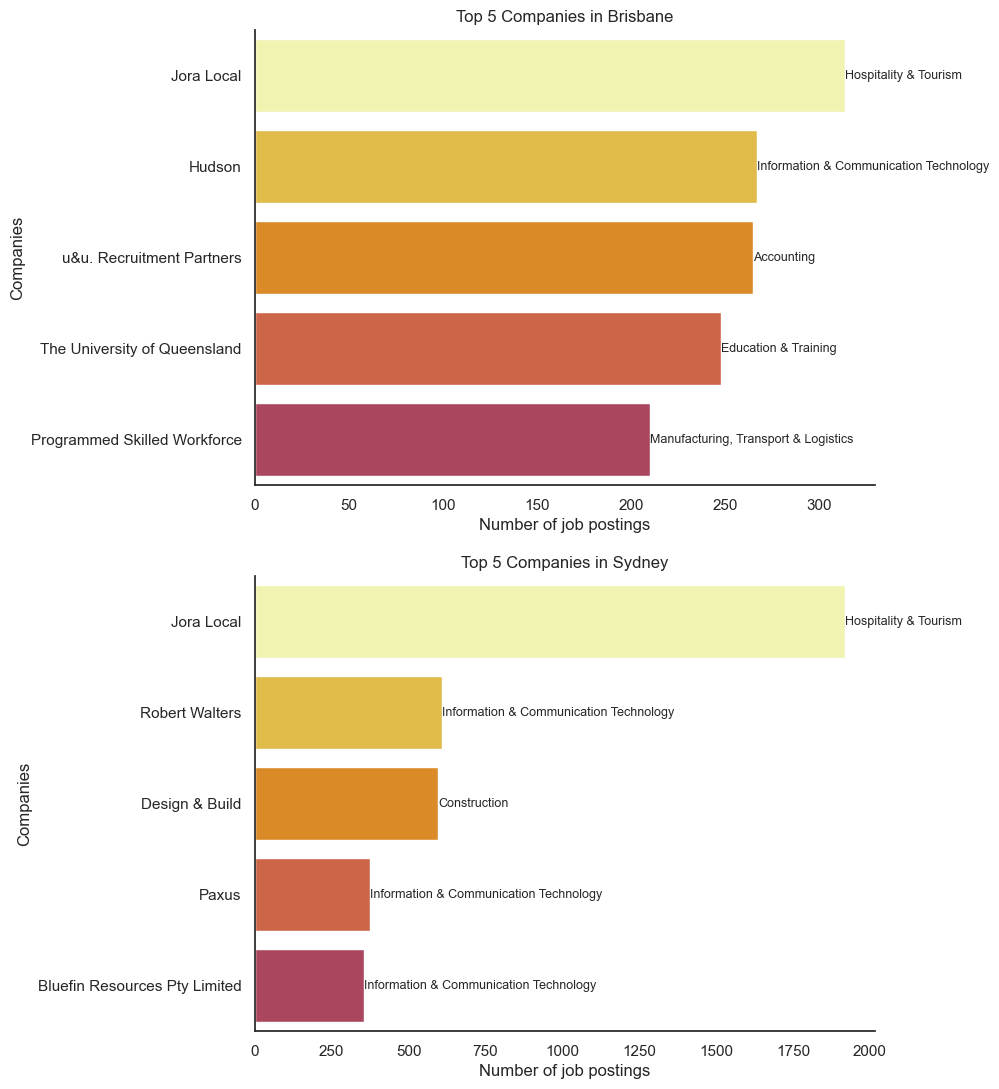

In [832]:
explode = [0.1-x*0.005 for x in range(5)]
rgba = plt.cm.inferno_r(np.linspace(0, 0.5, 5))

plt.figure(figsize=(8,13))
sns.set_style("white")
plt.subplot(211)
sns.barplot(data=brisbane_top5, x='Count', y='Company', palette=rgba, orient='y', hue='Company', legend=False)
plt.title('Top 5 Companies in Brisbane')
plt.xlabel('Number of job postings')
plt.ylabel('Companies')
for index, row in brisbane_top5.iterrows():
    plt.text(row['Count'], index, row['Sector'], ha='left', va='center', fontsize=9)
sns.despine()
plt.subplot(212)
sns.barplot(data=sydney_top5, x='Count', y='Company', palette=rgba, orient='y', hue='Company', legend=False)
plt.title('Top 5 Companies in Sydney')
plt.xlabel('Number of job postings')
plt.ylabel('Companies')
for index, row in sydney_top5.iterrows():
    plt.text(row['Count'], index, row['Sector'], ha='left', va='center', fontsize=9)
sns.despine()
plt.show()

### Between 2 cities, which do you think it is better for employees.

Explain...


## 2. Analyse by time. (2 points)

### In this part, we will analyse the jobs based on the posting date.


In [833]:
tqdm.pandas()

temp = df[['Date']].copy() 
temp['DayOfMonth'] = temp['Date'].progress_apply(lambda x: pd.Series(x.day))
temp['DayOfWeek'] = temp['Date'].progress_apply(lambda x: pd.Series(x.dayofweek))
temp['Month'] = temp['Date'].progress_apply(lambda x: pd.Series(x.month))
temp['Week'] = temp['Date'].progress_apply(lambda x: pd.Series(x.week))

days = temp['Date'].progress_apply(lambda x: pd.Series("{}_{}".format(x.day, x.month)))
day_months = days.iloc[:, 0].unique()
unique_day_count = {}

# Get unique days that data was recorded via retrieving day and month of posting
for day in day_months:
    d_m = day.split('_')
    d = int(d_m[0])
    m = int(d_m[1])
    
    if(d in unique_day_count):
        unique_day_count[d] += 1
    else:
        unique_day_count[d] = 1


100%|██████████| 318477/318477 [00:18<00:00, 16983.61it/s]


### Visualise the number of job posts by month.

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/1234864287.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=month_labels, y=month_counts, palette=rgba, hue=month_labels, legend=False)


Text(0, 0.5, 'Average number of Job Posts')

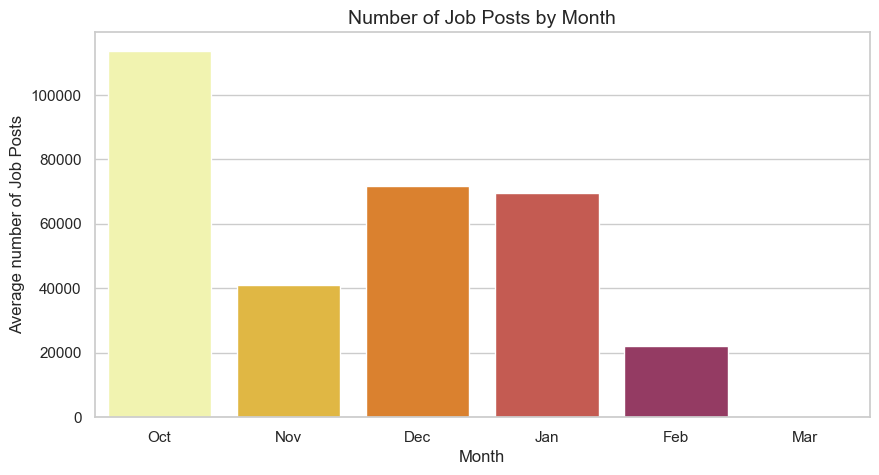

In [834]:
months = [10, 11, 12, 1, 2, 3]
month_counter = Counter(temp['Month'])
month_counts = [month_counter[m] for m in months]
month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
explode = [0.1-x*0.005 for x in range(len(months))]
rgba = plt.cm.inferno_r(np.linspace(0, 0.7, len(months)))
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x=month_labels, y=month_counts, palette=rgba, hue=month_labels, legend=False)
plt.title('Number of Job Posts by Month', size=14)
plt.xlabel('Month')
plt.ylabel('Average number of Job Posts')

### Visualise the number of job posts by day of week.

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/1003480459.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=weekdays, y=weekdays_counts, palette=rgba, hue=weekdays, legend=False)


Text(0, 0.5, 'Number of Job Posts')

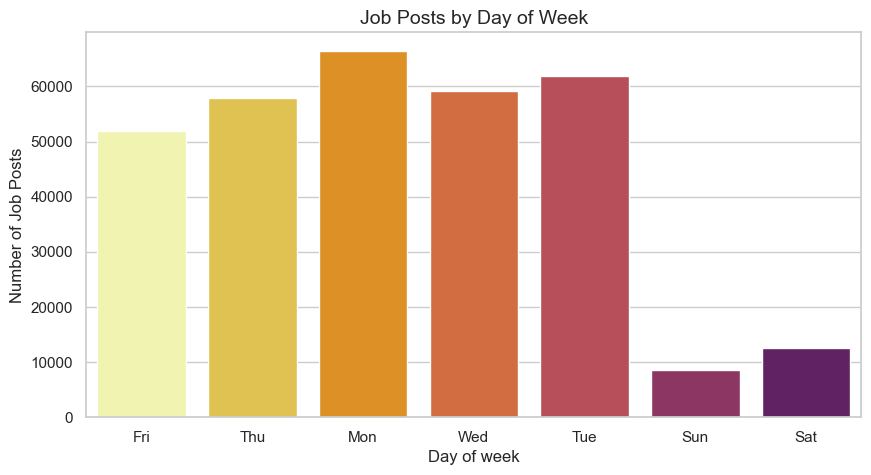

In [835]:
weekdays_counts = temp['DayOfWeek'].value_counts()
weekdays = weekdays_counts.index
explode = [0.1-x*0.005 for x in range(7)]
rgba = plt.cm.inferno_r(np.linspace(0, 0.7, 7))
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x=weekdays, y=weekdays_counts, palette=rgba, hue=weekdays, legend=False)
plt.xticks(weekdays,['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) 
plt.title('Job Posts by Day of Week', size=14)
plt.xlabel('Day of week')
plt.ylabel('Number of Job Posts')

### Visualise the number of job posts by day of the month.

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/4054527274.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3356.3333333333335' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dayofmonth_counts[day] = count / unique_day_count[day]
/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/4054527274.py:13: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=days, y=dayofmonth_counts, palette=rgba, hue=days, legend=False)


Text(0, 0.5, 'Number of Job Posts')

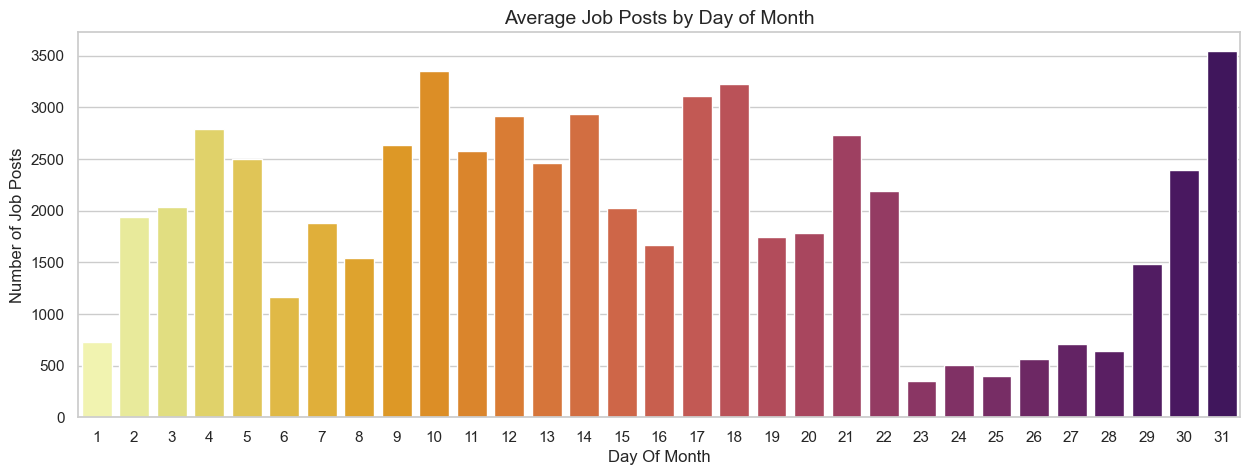

In [836]:
dayofmonth_counts = temp['DayOfMonth'].value_counts()


for day, count in dayofmonth_counts.items():
    dayofmonth_counts[day] = count / unique_day_count[day]

days = dayofmonth_counts.index

explode = [0.1-x*0.005 for x in range(30)]
rgba = plt.cm.inferno_r(np.linspace(0, 0.8, 31))
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.barplot(x=days, y=dayofmonth_counts, palette=rgba, hue=days, legend=False) 
plt.title('Average Job Posts by Day of Month', size=14)
plt.xlabel('Day Of Month')
plt.ylabel('Number of Job Posts')

### Visualise trending of the job postings for the big cities.

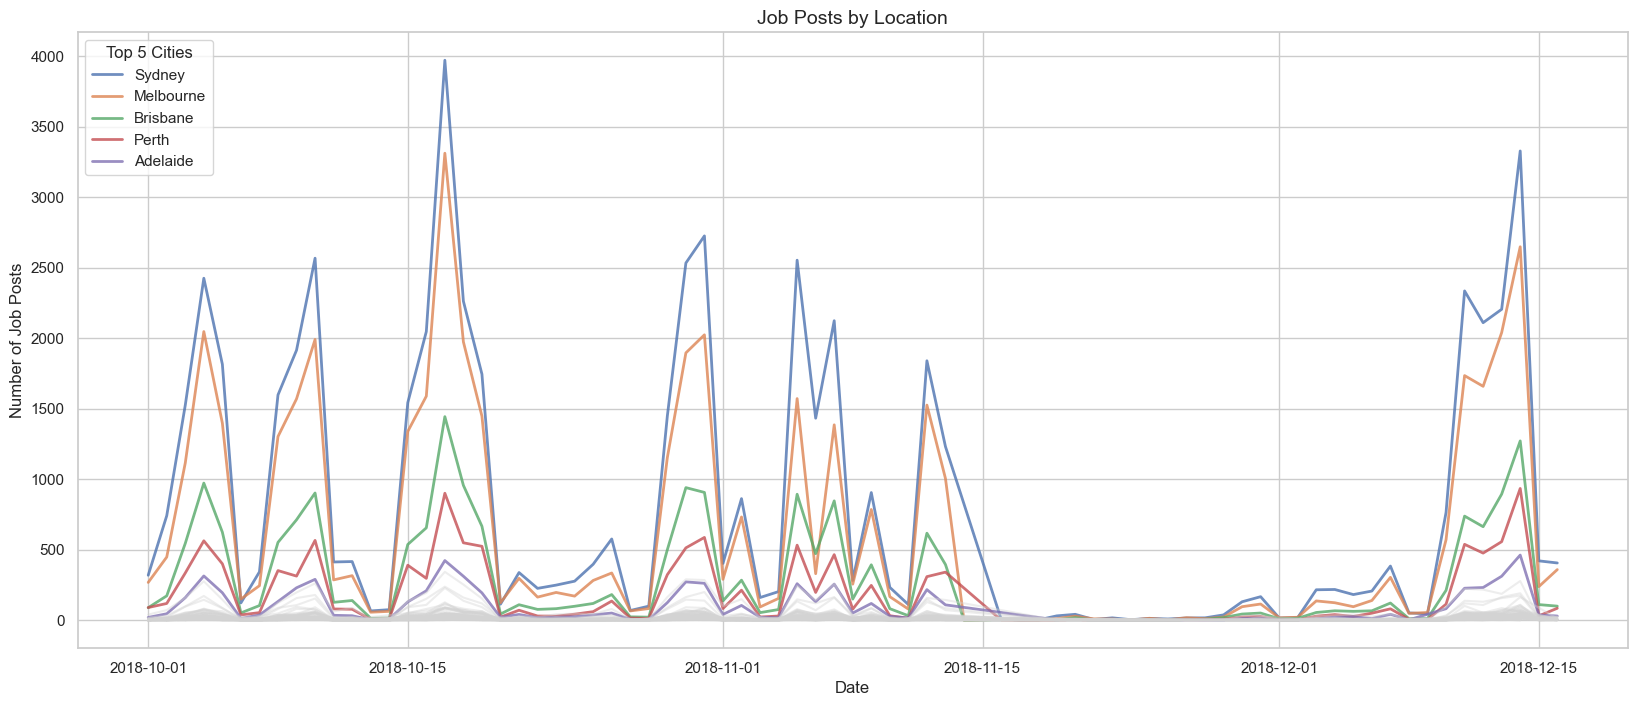

In [837]:
df_location = df[df['Location'].isna()==False]
plt.figure(figsize=(20,8))

df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Posts by Location',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

### Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.

Conclusion: ... 

## 3. Forecasting and skill extractions. (2 points)

### Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.

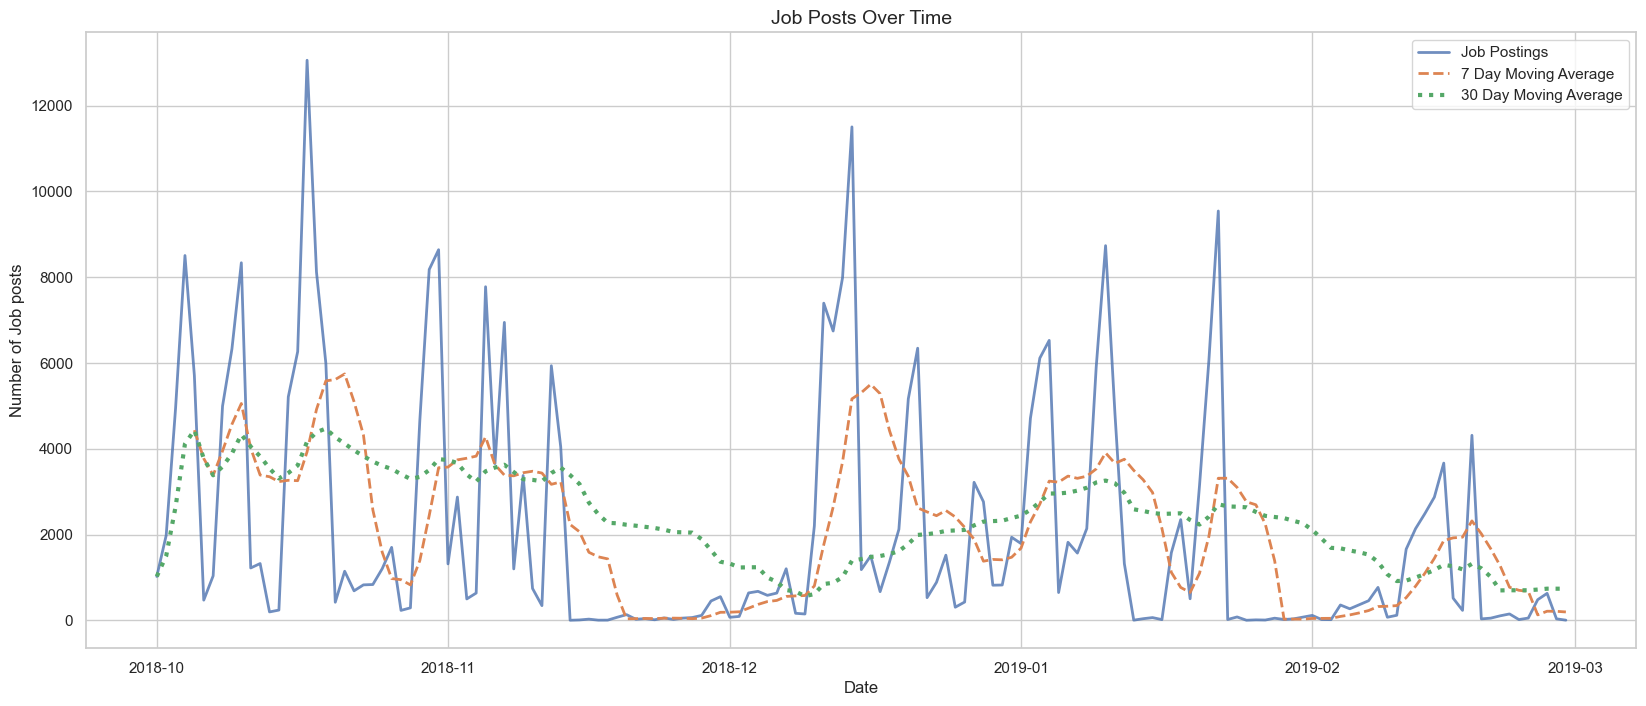

In [838]:
df_timeseries_total = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)

df_timeseries_total = df_timeseries_total[:151]

df_timeseries_total = df_timeseries_total['Title'].rename('Count')

moving_average_week = df_timeseries_total.rolling(7, min_periods=5)
moving_average_month = df_timeseries_total.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_timeseries_total, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

Explain ......

### Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**.

In [839]:
# Create a new DataFrame with only the Information & Communication Technology sector
it_df = df[df['Classification'] == 'Information & Communication Technology']


#Deleting columns with missing descriptions
it_df = it_df.dropna(subset=['Requirement', 'FullDescription'])

#removing html tags from the description
it_df['FullDescription'] = it_df['FullDescription'].replace(r'<.*?>', '', regex=True)

#Tokenize
it_df['tokens_req'] = it_df.apply(lambda row: word_tokenize(row['Requirement']), axis=1)
it_df['tokens_desc'] = it_df.apply(lambda row: word_tokenize(row['FullDescription']), axis=1)

#Remove punctuation
it_df['alpha_req'] = it_df['tokens_req'].apply(lambda x: [word for word in x if word.isalpha()])
it_df['alpha_desc'] = it_df['tokens_desc'].apply(lambda x: [word for word in x if word.isalpha()])

#Remove stop words
stop_words = stopwords.words('english')
it_df['stop_req'] = it_df['alpha_req'].apply(lambda x: [word for word in x if word not in stop_words])
it_df['stop_desc'] = it_df['alpha_desc'].apply(lambda x: [word for word in x if word not in stop_words])

#stemming
stemmer = PorterStemmer()
it_df['stem_req'] = it_df['stop_req'].apply(lambda x: [stemmer.stem(word) for word in x])
it_df['stem_desc'] = it_df['stop_desc'].apply(lambda x: [stemmer.stem(word) for word in x])

In [840]:
vectorizer = TfidfVectorizer(lowercase=False, analyzer=lambda x: x)
td_idf = vectorizer.fit_transform(it_df['stem_req']).toarray()
td_idf = pd.DataFrame(data=td_idf, columns=vectorizer.get_feature_names_out())

print("Highest words: ", td_idf.max(axis=0).sort_values(ascending=False).head(20)) 

Highest words:  month           1.000000
tibco           1.000000
develop         1.000000
bau             1.000000
avocado         1.000000
c               1.000000
interview       1.000000
start           1.000000
look            1.000000
till            1.000000
analyst         1.000000
freelanc        0.953203
sitecor         0.942280
synolog         0.937383
cryptographi    0.932595
etl             0.930141
skype           0.929912
android         0.927800
princip         0.927519
week            0.924453
dtype: float64


![image](req_words.png)

In [841]:
vectorizer = TfidfVectorizer(lowercase=False, analyzer=lambda x: x)
td_idf = vectorizer.fit_transform(it_df['stem_desc']).toarray()
td_idf = pd.DataFrame(data=td_idf, columns=vectorizer.get_feature_names_out())

print("Highest words: ", td_idf.max(axis=0).sort_values(ascending=False).head(20)) 

Highest words:  nbsp             0.990758
siam             0.940980
anaplan          0.934772
comptel          0.919659
gt               0.906807
bizflow          0.898918
ediscoveri       0.894486
servicenow       0.885553
sa               0.880008
tririga          0.878111
hpc              0.872586
qlikview         0.867047
test             0.866885
temeno           0.865959
ascend           0.865954
e                0.865934
microstrategi    0.863186
amadeu           0.858740
shopifi          0.858225
qlik             0.857445
dtype: float64


![image](desc_words.png)

# Part 4 - Discussion. (4 Marks)

### Scenario 1: Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words)

### Scenario 2: To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.*** ( Max 750 words)

# 1.5 Study by sectors

### Market by subsectors

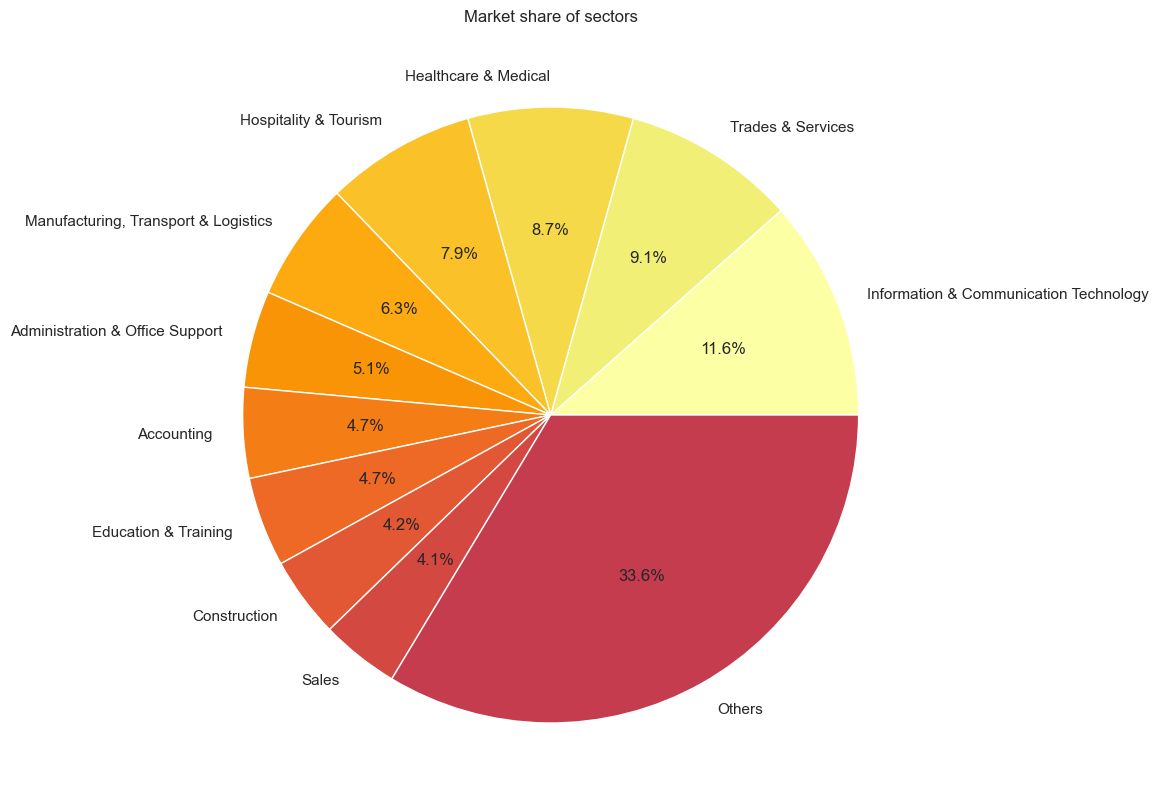

In [821]:


df_pie = df ['Classification'].groupby(df['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']
rgba = plt.cm.inferno_r(np.linspace(0, 1, len(df2)*2))
plt.figure(figsize=(10,10))
plt.pie(df2['Value'], labels = df2['Classification'], colors=rgba, autopct='%1.1f%%')
plt.title('Market share of sectors')
plt.show()



### Find the main spotlight sub-sectors in each sector (1 mark)

In [823]:
ictSubClassDf = df[df['Classification'] == 'Information & Communication Technology']    
orderOfSubClass= ictSubClassDf['SubClassification'].value_counts().index
orderOfSubClass

Index(['Developers/Programmers', 'Business/Systems Analysts',
       'Programme & Project Management', 'Architects',
       'Engineering - Software', 'Help Desk & IT Support',
       'Networks & Systems Administration', 'Consultants', 'Other',
       'Testing & Quality Assurance', 'Security', 'Management',
       'Engineering - Network', 'Database Development & Administration',
       'Web Development & Production', 'Sales - Pre & Post',
       'Product Management & Development', 'Telecommunications',
       'Team Leaders', 'Engineering - Hardware', 'Technical Writing',
       'Computer Operators'],
      dtype='object', name='SubClassification')

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/1982414231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/1982414231.py:3: UserWarning: The palette list has more values (30) than needed (22), which may not be intended.
  sns.boxplot(


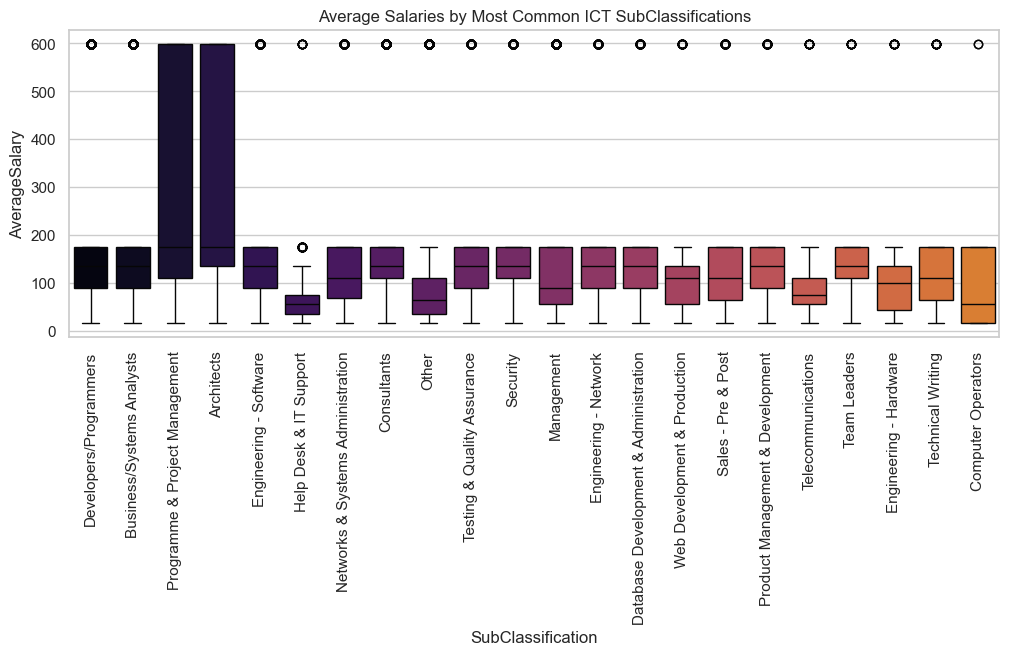

In [824]:

ictSubClassDf = df[df['Classification'] == 'Information & Communication Technology']    
plt.figure(figsize=(12,4))
sns.boxplot(
    data= df,
    x='SubClassification',
    y='AverageSalary',
    order=orderOfSubClass,
    palette=sns.color_palette("inferno", n_colors=30)
)
plt.title('Average Salaries by Most Common ICT SubClassifications')
plt.xticks(rotation=90)
plt.show()

### Visualize the salary range in the sectors/sub-sectors (1 mark)

/var/folders/hn/l_q03tpx0kbfyhh2z32kfb2c0000gn/T/ipykernel_15918/2160649361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


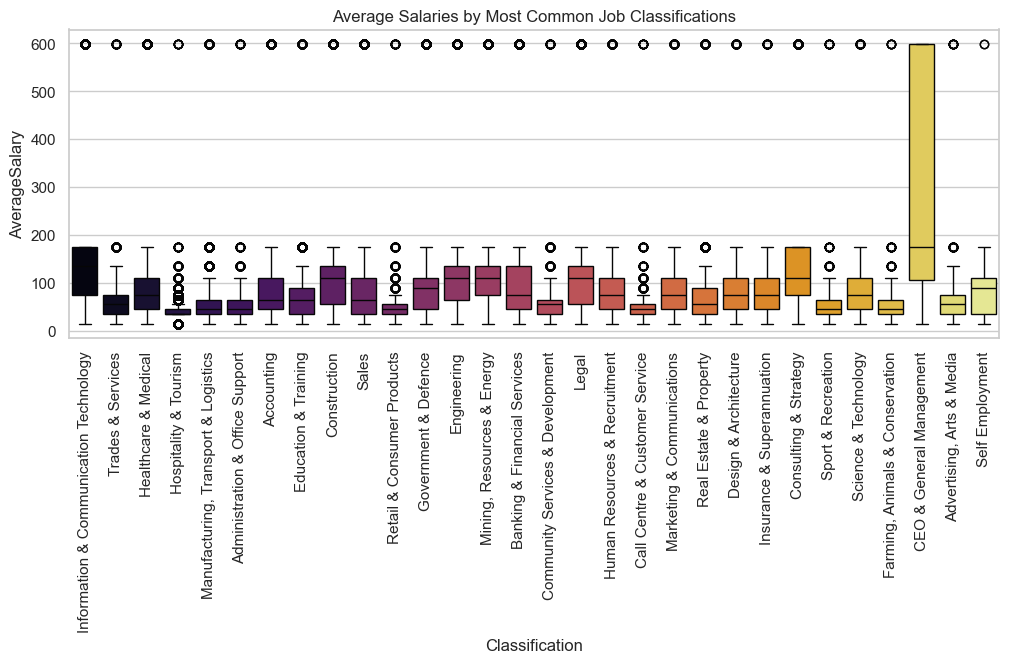

In [822]:
#your code here

plt.figure(figsize=(12,4))
sns.boxplot(
    data= df,
    x='Classification',
    y='AverageSalary',
    order=  ClassificationDf['Classification'],
    palette=sns.color_palette("inferno", n_colors=30)
)
plt.title('Average Salaries by Most Common Job Classifications')
plt.xticks(rotation=90)
plt.show()